# COVID-19 Test and Confirmed Case Analysis for Bangladesh until May 22, 2020

In [16]:
#!pip install html5lib
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import seaborn as sns
import datetime

### Data Importing and Wrangling 

In [17]:
# the the covid test and case dataset is downlaaded from:
# 'https://ourworldindata.org/grapher/covid-19-total-confirmed-cases-vs-total-tests-conducted?country=BGD'
# the name of the downloaded csv file is given 'covid_test_case.csv'  

covid_df = pd.read_csv('covid_test_case.csv', header=0)
covid_df.head()

,Entity,Code,Date,Total tests (tests),Total confirmed cases of COVID-19 (cases)
0,Afghanistan,AFG,"Dec 31, 2019",NaN,0.0
1,Afghanistan,AFG,"Jan 1, 2020",NaN,0.0
2,Afghanistan,AFG,"Jan 2, 2020",NaN,0.0
3,Afghanistan,AFG,"Jan 3, 2020",NaN,0.0
4,Afghanistan,AFG,"Jan 4, 2020",NaN,0.0


In [18]:
covid_df.dtypes

Entity                                        object
Code                                          object
Date                                          object
Total tests (tests)                          float64
Total confirmed cases of COVID-19 (cases)    float64
dtype: object

In [19]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'])
covid_df.head()

,Entity,Code,Date,Total tests (tests),Total confirmed cases of COVID-19 (cases)
0,Afghanistan,AFG,2019-12-31,NaN,0.0
1,Afghanistan,AFG,2020-01-01,NaN,0.0
2,Afghanistan,AFG,2020-01-02,NaN,0.0
3,Afghanistan,AFG,2020-01-03,NaN,0.0
4,Afghanistan,AFG,2020-01-04,NaN,0.0


In [20]:
bd_covid = covid_df[covid_df['Entity']=='Bangladesh'].reset_index(drop=True)
bd_covid.head()

,Entity,Code,Date,Total tests (tests),Total confirmed cases of COVID-19 (cases)
0,Bangladesh,BGD,2020-03-04,108.0,NaN
1,Bangladesh,BGD,2020-03-05,111.0,NaN
2,Bangladesh,BGD,2020-03-07,120.0,NaN
3,Bangladesh,BGD,2020-03-08,127.0,NaN
4,Bangladesh,BGD,2020-03-09,137.0,3.0


In [21]:
bd_covid.set_index('Date', inplace=True)
bd_covid.head()

,Entity,Code,Total tests (tests),Total confirmed cases of COVID-19 (cases)
Date,,,,
2020-03-04,Bangladesh,BGD,108.0,NaN
2020-03-05,Bangladesh,BGD,111.0,NaN
2020-03-07,Bangladesh,BGD,120.0,NaN
2020-03-08,Bangladesh,BGD,127.0,NaN
2020-03-09,Bangladesh,BGD,137.0,3.0


In [22]:
bd_covid.columns = ['Country', 'CountryCode', 'TotalTest', 'TotalConfirmedCases']
bd_covid.head()

,Country,CountryCode,TotalTest,TotalConfirmedCases
Date,,,,
2020-03-04,Bangladesh,BGD,108.0,NaN
2020-03-05,Bangladesh,BGD,111.0,NaN
2020-03-07,Bangladesh,BGD,120.0,NaN
2020-03-08,Bangladesh,BGD,127.0,NaN
2020-03-09,Bangladesh,BGD,137.0,3.0


### Numbers of Tests and Cases per Day Analysis

In [23]:
bd_covid[['Test', 'ConfirmedCases']] =bd_covid[['TotalTest', 'TotalConfirmedCases']].diff().fillna(bd_covid[['TotalTest', 'TotalConfirmedCases']].iloc[0])
bd_covid.head()

,Country,CountryCode,TotalTest,TotalConfirmedCases,Test,ConfirmedCases
Date,,,,,,
2020-03-04,Bangladesh,BGD,108.0,NaN,108.0,NaN
2020-03-05,Bangladesh,BGD,111.0,NaN,3.0,NaN
2020-03-07,Bangladesh,BGD,120.0,NaN,9.0,NaN
2020-03-08,Bangladesh,BGD,127.0,NaN,7.0,NaN
2020-03-09,Bangladesh,BGD,137.0,3.0,10.0,NaN


In [24]:
bd_covid.drop(bd_covid.index[-1], inplace=True)
bd_covid

,Country,CountryCode,TotalTest,TotalConfirmedCases,Test,ConfirmedCases
Date,,,,,,
2020-03-04,Bangladesh,BGD,108.0,NaN,108.0,NaN
2020-03-05,Bangladesh,BGD,111.0,NaN,3.0,NaN
2020-03-07,Bangladesh,BGD,120.0,NaN,9.0,NaN
2020-03-08,Bangladesh,BGD,127.0,NaN,7.0,NaN
2020-03-09,Bangladesh,BGD,137.0,3.0,10.0,NaN
...,...,...,...,...,...,...
2020-05-18,Bangladesh,BGD,185196.0,22268.0,9788.0,1273.0
2020-05-19,Bangladesh,BGD,193645.0,23870.0,8449.0,1602.0
2020-05-20,Bangladesh,BGD,203852.0,25121.0,10207.0,1251.0


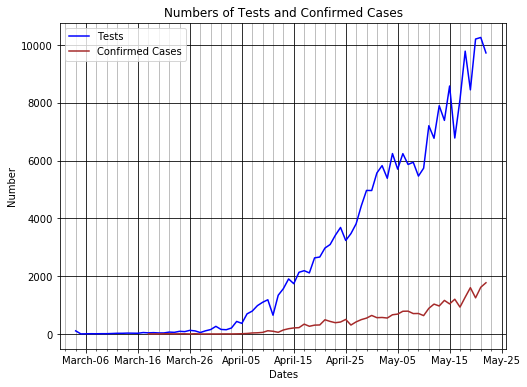

In [25]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
ax.grid(b=True, which='major', axis='both', color='k')
ax.grid(b=True, which='minor', axis='both')

sns.lineplot(x=bd_covid.index, y='Test', data=bd_covid, color='blue', ax=ax, label='Tests')
sns.lineplot(x=bd_covid.index, y='ConfirmedCases', data=bd_covid, color='brown', ax=ax, label='Confirmed Cases')

ax.set_xlim(datetime.date(2020,3,1),None)
format_10days = dates.DayLocator(interval=10)
ax.xaxis.set_major_locator(format_10days)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(dates.DateFormatter('%B-%d'))
ax.set_xlabel('Dates')
ax.set_ylabel('Number')
ax.set_title('Numbers of Tests and Confirmed Cases')
plt.show()

### Case-Test Ratio Analysis

In [29]:
bd_covid['Cases_TestRatio'] = bd_covid['ConfirmedCases']/bd_covid['Test']
bd_covid

,Country,CountryCode,TotalTest,TotalConfirmedCases,Test,ConfirmedCases,Cases_TestRatio
Date,,,,,,,
2020-03-04,Bangladesh,BGD,108.0,NaN,108.0,NaN,NaN
2020-03-05,Bangladesh,BGD,111.0,NaN,3.0,NaN,NaN
2020-03-07,Bangladesh,BGD,120.0,NaN,9.0,NaN,NaN
2020-03-08,Bangladesh,BGD,127.0,NaN,7.0,NaN,NaN
2020-03-09,Bangladesh,BGD,137.0,3.0,10.0,NaN,NaN
...,...,...,...,...,...,...,...
2020-05-18,Bangladesh,BGD,185196.0,22268.0,9788.0,1273.0,0.130057
2020-05-19,Bangladesh,BGD,193645.0,23870.0,8449.0,1602.0,0.189608
2020-05-20,Bangladesh,BGD,203852.0,25121.0,10207.0,1251.0,0.122563


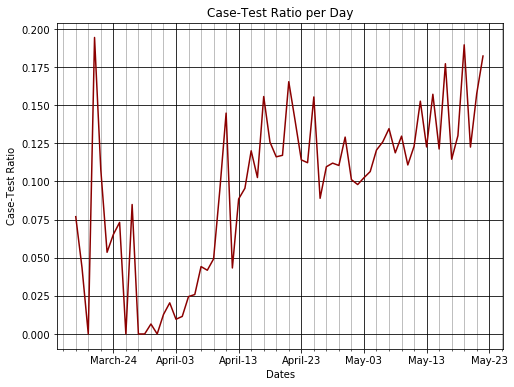

In [31]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
ax.grid(b=True, which='major', axis='both', color='k')
ax.grid(b=True, which='minor', axis='both')

sns.lineplot(x=bd_covid.index, y='Cases_TestRatio', data=bd_covid, color='darkred', ax=ax)

ax.set_xlim(datetime.date(2020,3,15),None)
format_10days = dates.DayLocator(interval=10)
ax.xaxis.set_major_locator(format_10days)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(dates.DateFormatter('%B-%d'))
ax.set_xlabel('Dates')
ax.set_ylabel('Case-Test Ratio')
ax.set_title('Case-Test Ratio per Day')

plt.show()